Training MSE: 1.01
Testing MSE: 0.92
Training R-squared: 0.76
Testing R-squared: 0.65


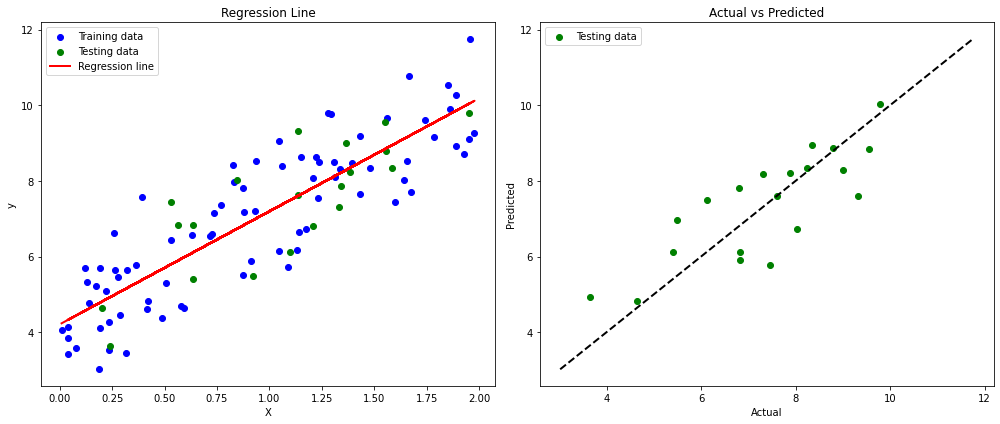

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset (for this example, we'll use a synthetic dataset)
# Let's create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert to pandas DataFrame for convenience
data = pd.DataFrame(np.hstack((X, y)), columns=["X", "y"])

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["X"]], data["y"], test_size=0.2, random_state=42)

# Step 3: Train the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model's performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")

# Step 5: Visualize the regression line and actual vs. predicted values
plt.figure(figsize=(14, 6))

# Plot the regression line
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X, model.predict(data[["X"]]), color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()

# Plot actual vs. predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Testing data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
